# Pre-Precessing Data


In [164]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import plotly.graph_objs as go

In [165]:
tickers = ['^NDX','^NSEI']

In [166]:
df = pd.DataFrame()
for ticker in tickers:
    df_tmp=yf.download(ticker, start='2010-1-10', end='2023-5-5')
    df_tmp['Ticker'] = ticker
    df = pd.concat([df, df_tmp])
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2010-01-11 00:00:00-05:00,1896.050049,1897.489990,1876.250000,1886.239990,1886.239990,2077890000,^NDX
2010-01-12 00:00:00-05:00,1874.750000,1876.369995,1852.310059,1861.790039,1861.790039,2368320000,^NDX
2010-01-13 00:00:00-05:00,1868.199951,1890.810059,1855.270020,1886.130005,1886.130005,2318350000,^NDX
2010-01-14 00:00:00-05:00,1880.459961,1891.729980,1880.349976,1886.520020,1886.520020,2254170000,^NDX
2010-01-15 00:00:00-05:00,1887.310059,1893.479980,1857.109985,1864.520020,1864.520020,2637770000,^NDX
...,...,...,...,...,...,...,...
2023-04-27 00:00:00+05:30,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400,^NSEI
2023-04-28 00:00:00+05:30,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300,^NSEI
2023-05-02 00:00:00+05:30,18124.800781,18180.250000,18101.750000,18147.650391,18147.650391,265200,^NSEI


In [167]:
df.reset_index(inplace=True)


In [168]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce',utc=True)


In [169]:
df['Date']=df['Date'].dt.strftime("%Y-%m-%d")
df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2010-01-11,1896.050049,1897.489990,1876.250000,1886.239990,1886.239990,2077890000,^NDX
1,2010-01-12,1874.750000,1876.369995,1852.310059,1861.790039,1861.790039,2368320000,^NDX
2,2010-01-13,1868.199951,1890.810059,1855.270020,1886.130005,1886.130005,2318350000,^NDX
3,2010-01-14,1880.459961,1891.729980,1880.349976,1886.520020,1886.520020,2254170000,^NDX
4,2010-01-15,1887.310059,1893.479980,1857.109985,1864.520020,1864.520020,2637770000,^NDX
...,...,...,...,...,...,...,...,...
6613,2023-04-26,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400,^NSEI
6614,2023-04-27,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300,^NSEI
6615,2023-05-01,18124.800781,18180.250000,18101.750000,18147.650391,18147.650391,265200,^NSEI
6616,2023-05-02,18113.800781,18116.349609,18042.400391,18089.849609,18089.849609,226200,^NSEI


In [170]:
df.groupby('Ticker')['Date'].agg(['min', 'max', 'count'])

,min,max,count
Ticker,,,
^NDX,2010-01-11,2023-05-04,3352
^NSEI,2010-01-10,2023-05-03,3266


# Correlation Analysis:


In [171]:
df_mod = df[['Date', 'Ticker', 'Adj Close']]
df_mod.columns = ['date', 'ticker', 'price']
df_mod

,date,ticker,price
0,2010-01-11,^NDX,1886.239990
1,2010-01-12,^NDX,1861.790039
2,2010-01-13,^NDX,1886.130005
3,2010-01-14,^NDX,1886.520020
4,2010-01-15,^NDX,1864.520020
...,...,...,...
6613,2023-04-26,^NSEI,17915.050781
6614,2023-04-27,^NSEI,18065.000000
6615,2023-05-01,^NSEI,18147.650391
6616,2023-05-02,^NSEI,18089.849609


In [172]:
df1 = df_mod.pivot_table(index=['date'], columns='ticker', values=['price'])
df1.columns = [col[1] for col in df1.columns.values]
df1=df1.dropna()
df1

,^NDX,^NSEI
date,,
2010-01-11,1886.239990,5210.399902
2010-01-12,1861.790039,5233.950195
2010-01-13,1886.130005,5259.899902
2010-01-14,1886.520020,5252.200195
2010-01-19,1895.479980,5221.700195
...,...,...
2023-04-26,12806.480469,17915.050781
2023-04-27,13160.030273,18065.000000
2023-05-01,13231.469727,18147.650391


In [173]:
# compute daily returns using pandas pct_change()
df_daily_returns = df1.pct_change()
# skip first row with NA 
df_daily_returns = df_daily_returns[1:]
df_daily_returns

,^NDX,^NSEI
date,,
2010-01-12,-0.012962,0.004520
2010-01-13,0.013073,0.004958
2010-01-14,0.000207,-0.001464
2010-01-19,0.004749,-0.005807
2010-01-20,-0.014524,-0.024427
...,...,...
2023-04-26,0.006394,0.005695
2023-04-27,0.027607,0.008370
2023-05-01,0.005429,0.004575


In [174]:
corr=df_daily_returns['^NDX'].corr(df_daily_returns['^NSEI'])
corr

0.35409465227641806

In [175]:
corr=df1['^NDX'].corr(df1['^NSEI'])
corr

0.9550922254504884

Correction came to be positive of strength .95

# Lead-Lag Relationship:

In [176]:
fig = px.line(df_mod, x='date',
              y='price', color='ticker',
              title='Performance - Daily Simple Returns',
              labels={'daily_return_pct':'daily returns (%)'})
fig.show()

In [177]:
# reset the index, moving `date` as column
df_daily_returns = df_daily_returns.reset_index()
# use `melt`
df2 = df_daily_returns.melt(id_vars=['date'], var_name='ticker', value_name='daily_return')
# add one more column, showing the daily_return as percent
df2['daily_return_pct'] = df2['daily_return'] * 100
df2

,date,ticker,daily_return,daily_return_pct
0,2010-01-12,^NDX,-0.012962,-1.296227
1,2010-01-13,^NDX,0.013073,1.307342
2,2010-01-14,^NDX,0.000207,0.020678
3,2010-01-19,^NDX,0.004749,0.474947
4,2010-01-20,^NDX,-0.014524,-1.452404
...,...,...,...,...
5021,2023-04-26,^NSEI,0.005695,0.569515
5022,2023-04-27,^NSEI,0.008370,0.837001
5023,2023-05-01,^NSEI,0.004575,0.457517
5024,2023-05-02,^NSEI,-0.003185,-0.318503


In [178]:
fig = px.line(df2, x='date',
              y='daily_return_pct', color='ticker',
              title='Performance - Daily Simple Returns',
              labels={'daily_return_pct':'daily returns (%)'})
fig.show()

In [179]:
# data=df_daily_returns
data=df1
data['^NSEI_Lagged'] = data['^NSEI'].shift(1)  # Lag the returns of Index2 by 1 day

data['^NDX_Leads'] = np.where(data['^NDX'] > data['^NSEI_Lagged'], 1, 0)
data['^NSEI_Leads'] = np.where(data['^NSEI_Lagged'] > data['^NDX'], 1, 0)

In [180]:
if data['^NDX_Leads'].sum() > data['^NSEI_Leads'].sum():
    index_for_optimization = '^NDX'
else:
    index_for_optimization = '^NSEI'

print('Index for parameter optimization:', index_for_optimization)

Index for parameter optimization: ^NSEI


Based on the observed lead-lag relationship, it has been consistently observed that NASDAQ tends to lead NSE, implying that changes in NASDAQ generally occur prior to changes in NSE. Consequently, selecting NASDAQ as the basis for parameter optimization is anticipated to yield more favorable outcomes.

# Indicator Coding:


Keltner Channel

In [181]:
data=yf.download('^NSEI', start='2010-1-1', end='2023-5-1')
data['KC_MA'] = data['Close'].rolling(window=20).mean()
data['KC_ATR'] = data['High'] - data['Low']
data['KC_UB'] = data['KC_MA'] + (2 * data['KC_ATR'])
data['KC_LB'] = data['KC_MA'] - (2 * data['KC_ATR'])

[*********************100%***********************]  1 of 1 completed


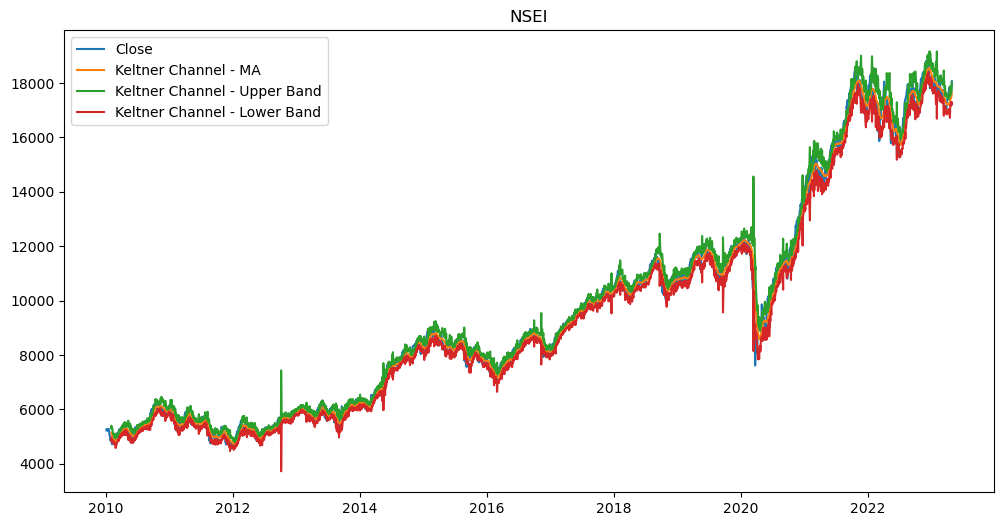

In [182]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['KC_MA'], label='Keltner Channel - MA')
plt.plot(data['KC_UB'], label='Keltner Channel - Upper Band')
plt.plot(data['KC_LB'], label='Keltner Channel - Lower Band')
plt.title("NSEI")
plt.legend()
plt.show()

In [183]:
#implementation of Keltner
import numpy as np
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal

In [184]:
buy_price, sell_price, kc_signal = implement_kc_strategy(data['Close'], data['KC_UB'], data['KC_LB'])
data=data.iloc[:-1,:]

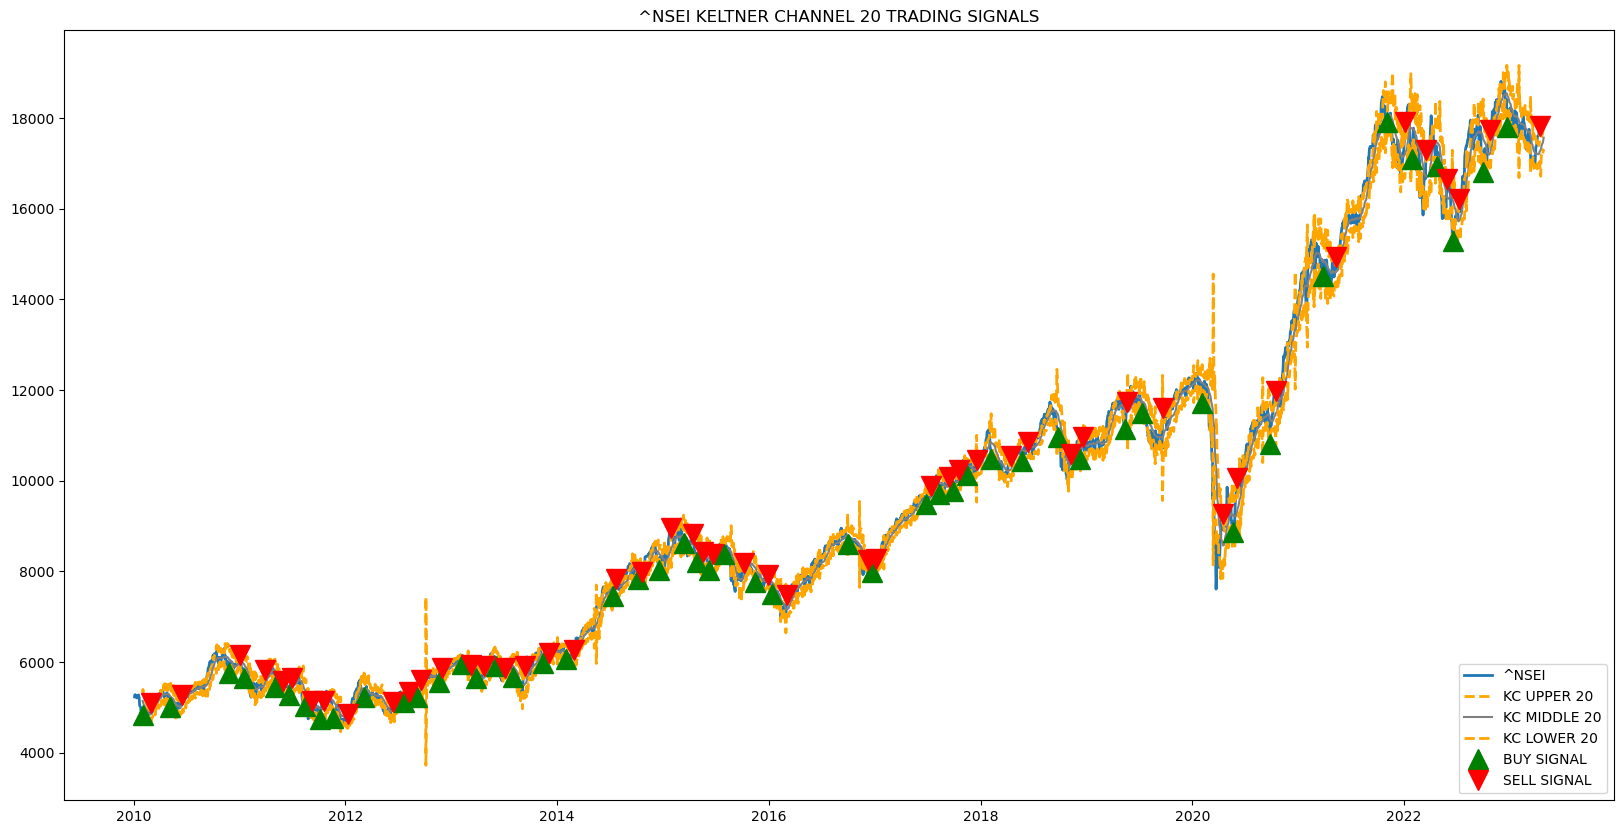

In [185]:

plt.figure(figsize=(20,10))
plt.plot(data['Close'], linewidth = 2, label = '^NSEI')
plt.plot(data['KC_UB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC UPPER 20')
plt.plot(data['KC_MA'], linewidth = 1.5, color = 'grey', label = 'KC MIDDLE 20')
plt.plot(data['KC_LB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC LOWER 20')
plt.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'lower right')
plt.title('^NSEI KELTNER CHANNEL 20 TRADING SIGNALS')
plt.show()

In [186]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]

In [187]:
np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()

500.91326541016883

In [188]:
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)

In [189]:
import math
def sharpe_ratio(data, risk_free_rate=0):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(np2-np1)

0.43806388624799114

In [190]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np2-np1)

0.30309615580830157

In [191]:
print("MDD_KC",(np1-np2).min()/np2[18,0]*100,"%")

MDD_KC -18.837973195892648 %


In [192]:
print("CUMM_Return_KC",((np2-np1)/np1).max()*100,"%")

CUMM_Return_KC 13.317230883005408 %


Bollinger Bands

In [193]:
data=yf.download('^NSEI', start='2010-1-1', end='2023-5-1')
data['BB_MA'] = data['Close'].rolling(window=20).mean()
data['BB_std'] = data['Close'].rolling(window=20).std()
data['BB_UB'] = data['BB_MA'] + (2 * data['BB_std'])
data['BB_LB'] = data['BB_MA'] - (2 * data['BB_std'])

[*********************100%***********************]  1 of 1 completed


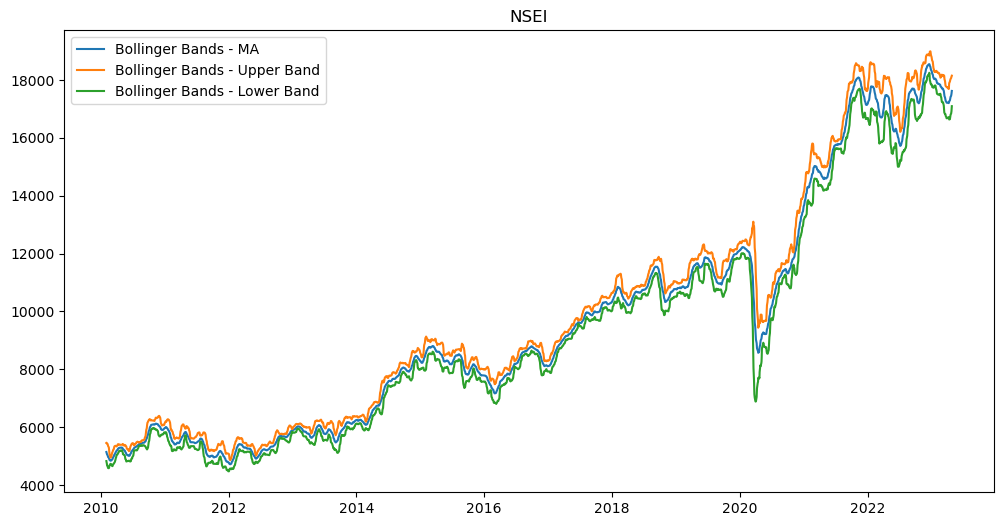

In [194]:
plt.figure(figsize=(12, 6))
plt.plot(data['BB_MA'], label='Bollinger Bands - MA')
plt.plot(data['BB_UB'], label='Bollinger Bands - Upper Band')
plt.plot(data['BB_LB'], label='Bollinger Bands - Lower Band')
plt.legend(loc='best')
plt.title("NSEI")
plt.show()

In [195]:
#implementing Bollinger bands
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price_bb = []
    sell_price_bb = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price_bb.append(data[i])
                sell_price_bb.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price_bb.append(np.nan)
            sell_price_bb.append(np.nan)
            bb_signal.append(0)
            
    return buy_price_bb, sell_price_bb, bb_signal


In [196]:
buy_price_bb, sell_price_bb, bb_signal = implement_bb_strategy(data['Close'], data['BB_UB'], data['BB_LB'])


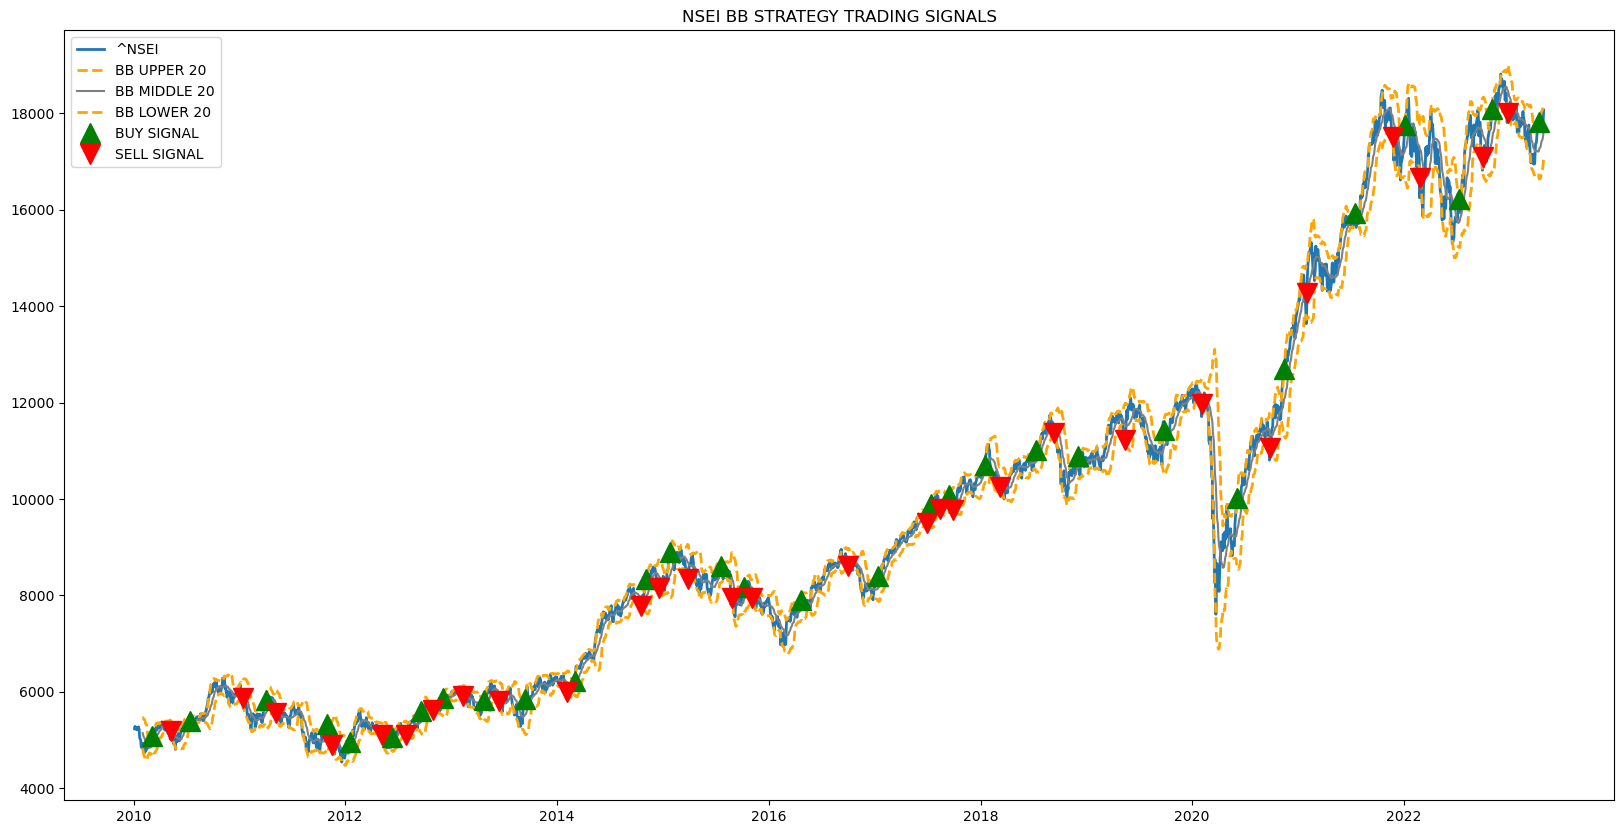

In [197]:
plt.figure(figsize=(20,10))
plt.plot(data['Close'], linewidth = 2, label = '^NSEI')
plt.plot(data['BB_UB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'BB UPPER 20')
plt.plot(data['BB_MA'], linewidth = 1.5, color = 'grey', label = 'BB MIDDLE 20')
plt.plot(data['BB_LB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'BB LOWER 20')
plt.plot(data.index, buy_price_bb, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data.index, sell_price_bb, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('NSEI BB STRATEGY TRADING SIGNALS')
plt.show()

In [198]:
buy_price_bb=pd.DataFrame(buy_price_bb)
buy_price_bb=buy_price_bb.fillna(0)
buy_price_bb=buy_price_bb[~(buy_price_bb == 0).all(axis=1)]
sell_price_bb=pd.DataFrame(sell_price_bb)
sell_price_bb=sell_price_bb.fillna(0)
sell_price_bb=sell_price_bb[~(sell_price_bb == 0).all(axis=1)]

In [199]:
np_buy_bb=np.array(buy_price_bb)
np_buy_bb = np_buy_bb[:-1]
np_sell_bb=np.array(sell_price_bb)
(np_sell_bb-np_buy_bb).mean()

216.96383351293105

In [200]:
def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_return/sigma)

sharpe_ratio(np_sell_bb-np_buy_bb)

0.3240500514250054

In [201]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np_sell_bb-np_buy_bb)

0.7512898905355797

In [202]:
print("MDD_BB",(np_buy_bb-np_sell_bb).min()/np_sell_bb[6,0]*100,"%")

MDD_BB -28.300449051562993 %


In [203]:
print("CUMM_Return_BB",((np_sell_bb-np_buy_bb)/np_buy_bb).max()*100,"%")

CUMM_Return_BB 25.046411223769834 %


MACD

In [204]:
data=yf.download('^NSEI', start='2010-1-1', end='2023-5-1')
data['MACD_12EMA'] = data['Close'].ewm(span=12, adjust=False).mean()
data['MACD_26EMA'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['MACD_12EMA'] - data['MACD_26EMA']
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

[*********************100%***********************]  1 of 1 completed


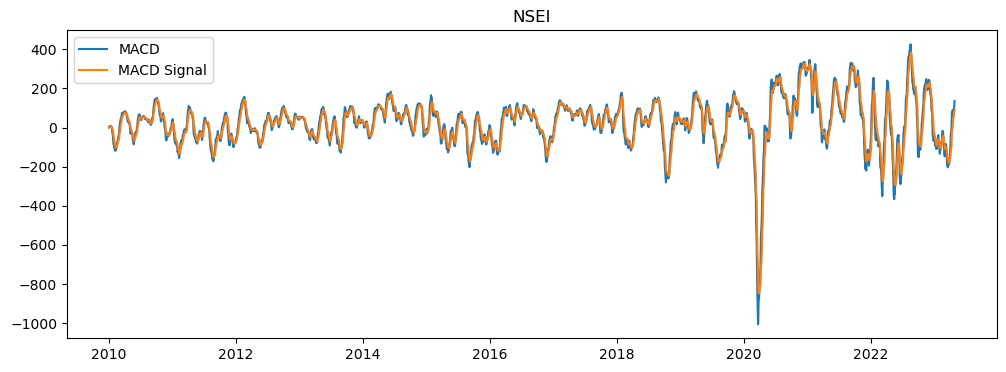

In [205]:
plt.figure(figsize=(12, 4))
plt.plot(data['MACD'], label='MACD')
plt.plot(data['MACD_Signal'], label='MACD Signal')

plt.legend()
plt.title("NSEI")
plt.show()

In [206]:
def generate_signals(df):
    buy_list = []
    sell_list = []
    flag = -1
    
    for i in range(0,len(df)):
        if df['MACD'][i] > df['MACD_Signal'][i]:         # first occurence of MACD crossing above signal oine
            sell_list.append(np.nan)                 # so first flip above means buy
            if flag != 1:                            # after first occurence I record flip to ignore
                buy_list.append(df['Close'][i])      # from here onward
                flag = 1
            else:
                buy_list.append(np.nan)
        elif df['MACD'][i] < df['MACD_Signal'][i]:
            buy_list.append(np.nan)
            if flag != 0:
                sell_list.append(df['Close'][i])
                flag = 0
            else:
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)            


# create buy and sell column
signal = generate_signals(data)
data['buy_sig'] = signal[0]
data['sell_sig'] = signal[1]

In [207]:
buy_sig_md=pd.DataFrame(data['buy_sig']).fillna(0)
buy_sig_md

buy_sig_md=buy_sig_md[~(buy_sig_md == 0).all(axis=1)]
buy_sig_md
np_buy_md=np.array(buy_sig_md)

sell_sig_md=pd.DataFrame(data['sell_sig']).fillna(0)
sell_sig_md

sell_sig_md=sell_sig_md[~(sell_sig_md == 0).all(axis=1)]
sell_sig_md
np_sell_md=np.array(sell_sig_md)

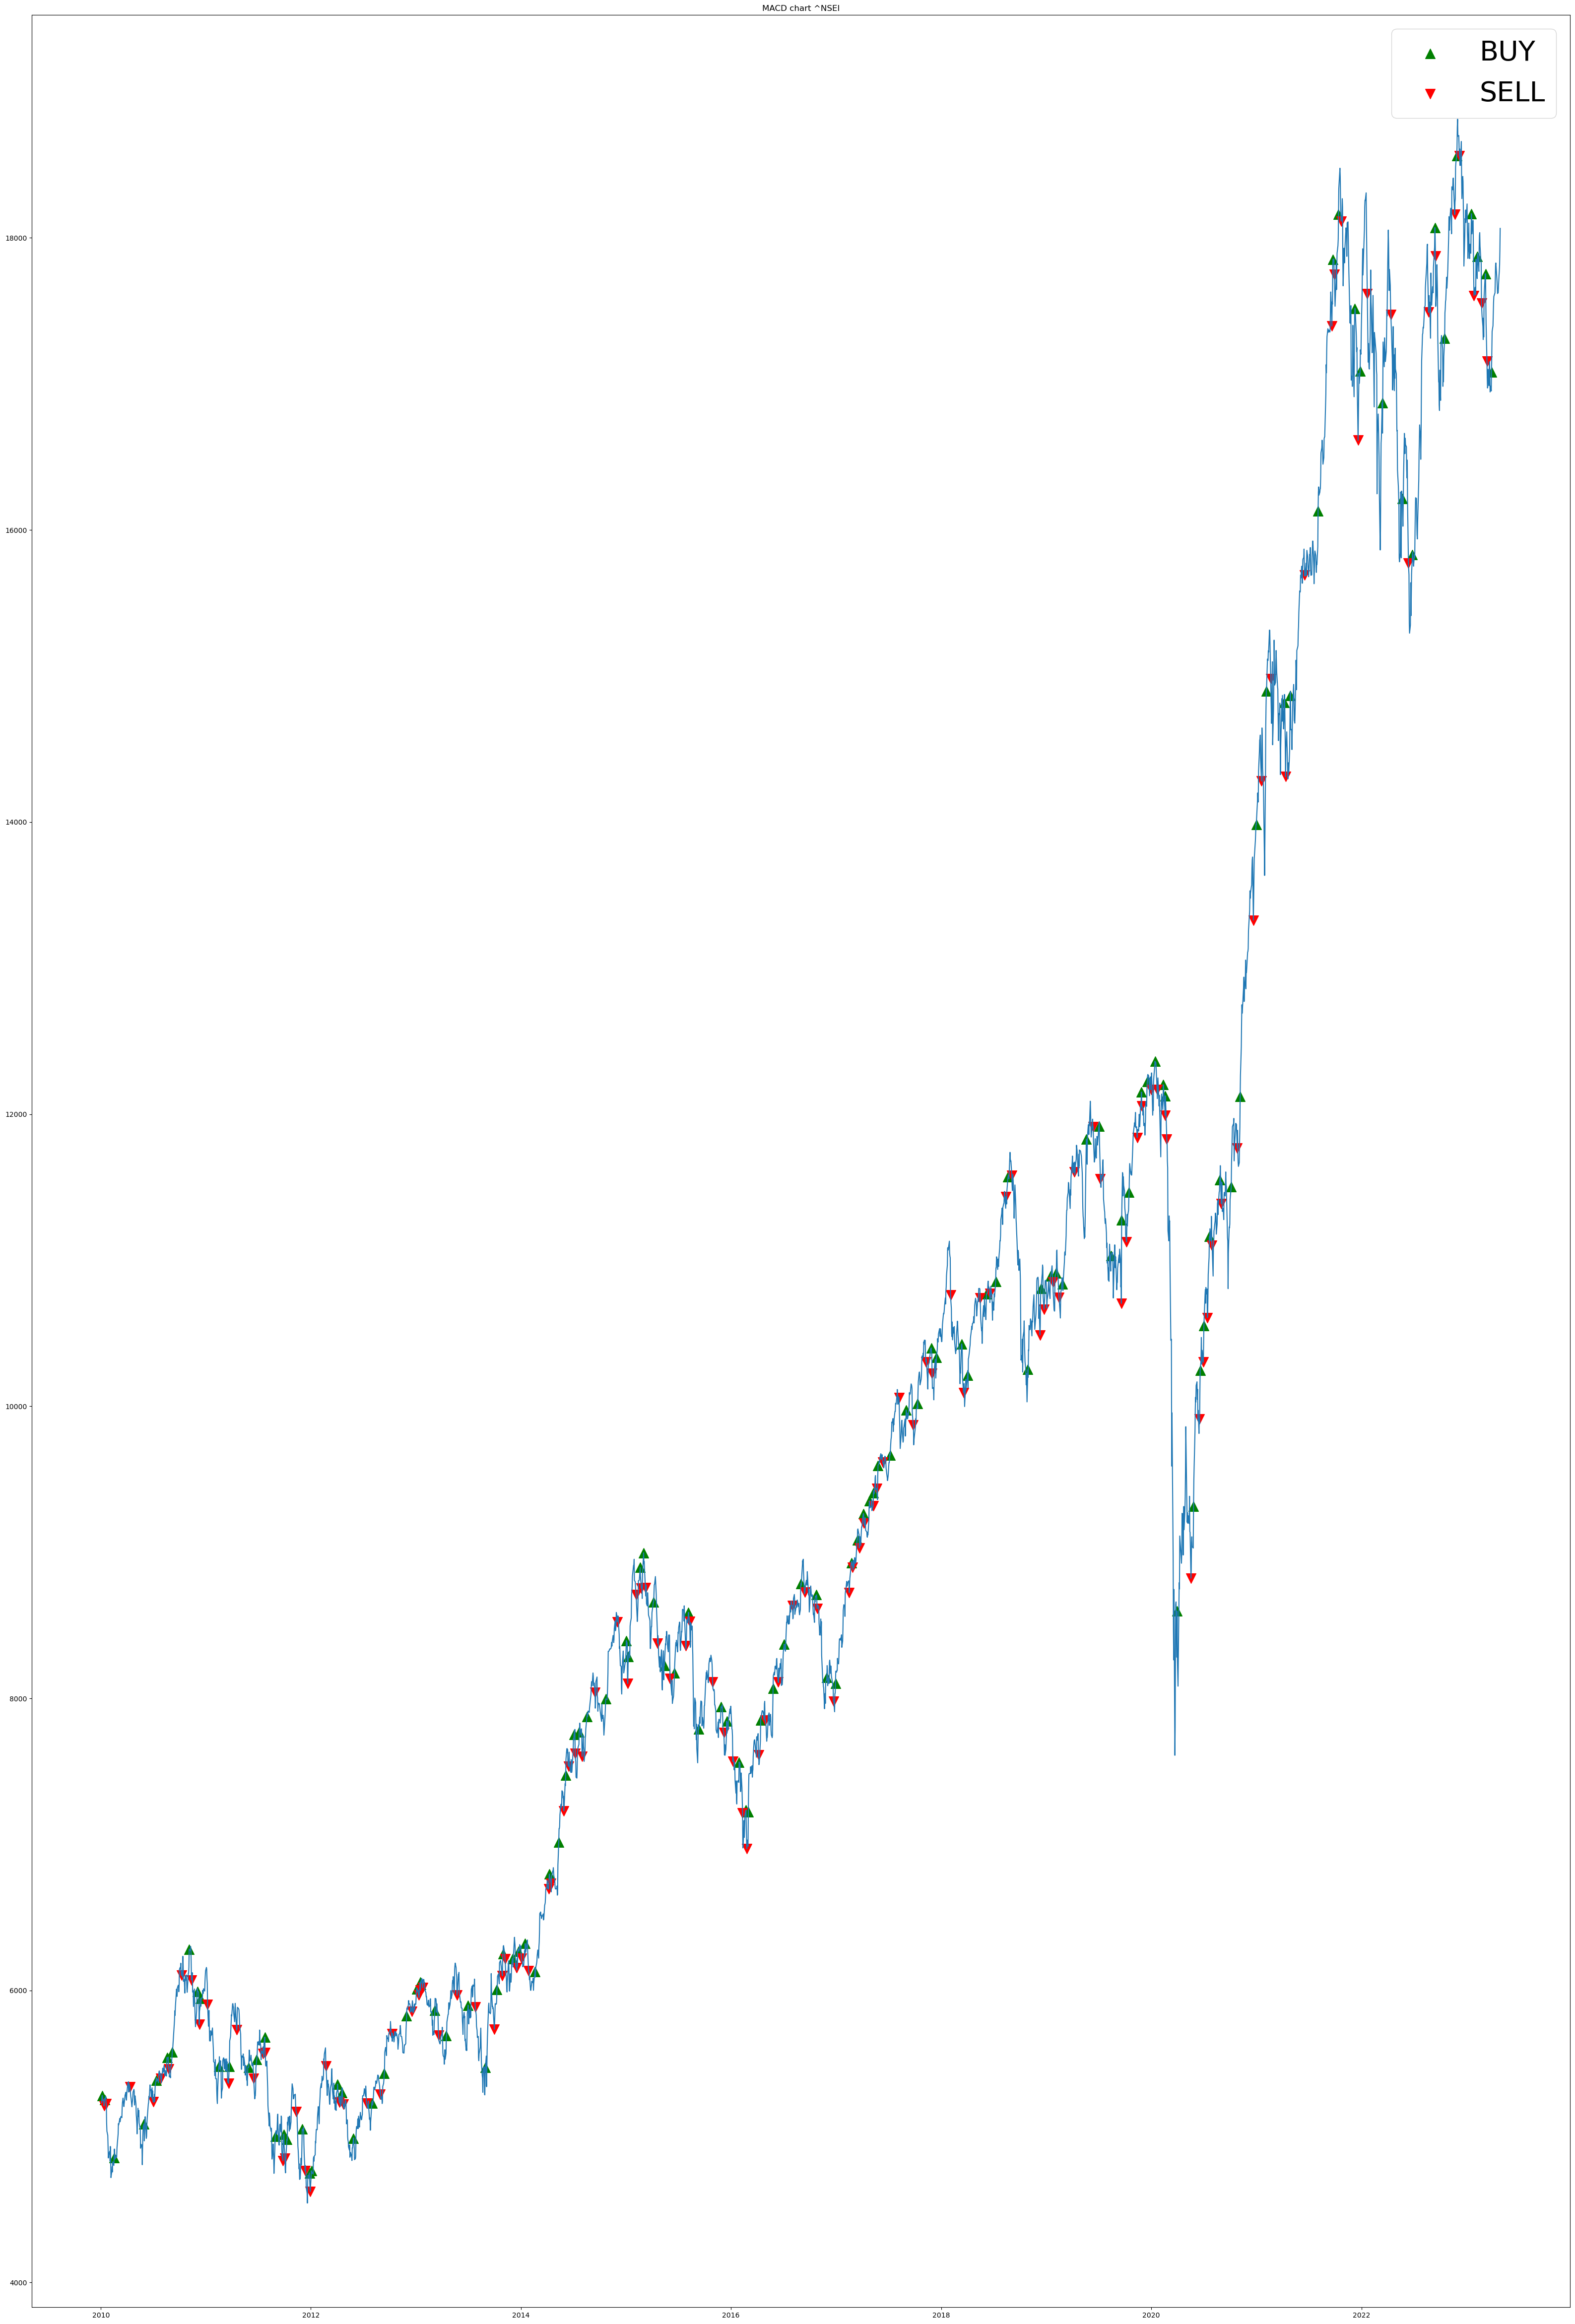

In [208]:
plt.figure(figsize=(40,60))
plt.plot( data['Close'])
plt.title('Price chart (Close) ' + str(ticker))
plt.title('MACD chart ' + str(ticker))
plt.scatter(data.index, data.buy_sig, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(data.index, data.sell_sig, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.legend(fontsize="40")
plt.show()

In [209]:
np_buy_md=np_buy_md[:-1]
(np_sell_md-np_buy_md).mean()

60.898765625

In [210]:
def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_return/sigma)

sharpe_ratio(np_sell_md-np_buy_md)

0.16675361734907584

In [211]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np_sell_md-np_buy_md)

0.38904088624809824

In [212]:
pd.DataFrame(np_buy_md-np_sell_md).idxmin()
print("MDD_MACD",(np_buy_md-np_sell_md).min()/np_sell_md[22,0]*100,"%")
print("CUMM_Return_MACD",((np_sell_md-np_buy_md)/np_buy_md).max()*100,"%")

MDD_MACD -31.758770836202398 %
CUMM_Return_MACD 15.06725766327907 %


Keltner Channel

[*********************100%***********************]  1 of 1 completed


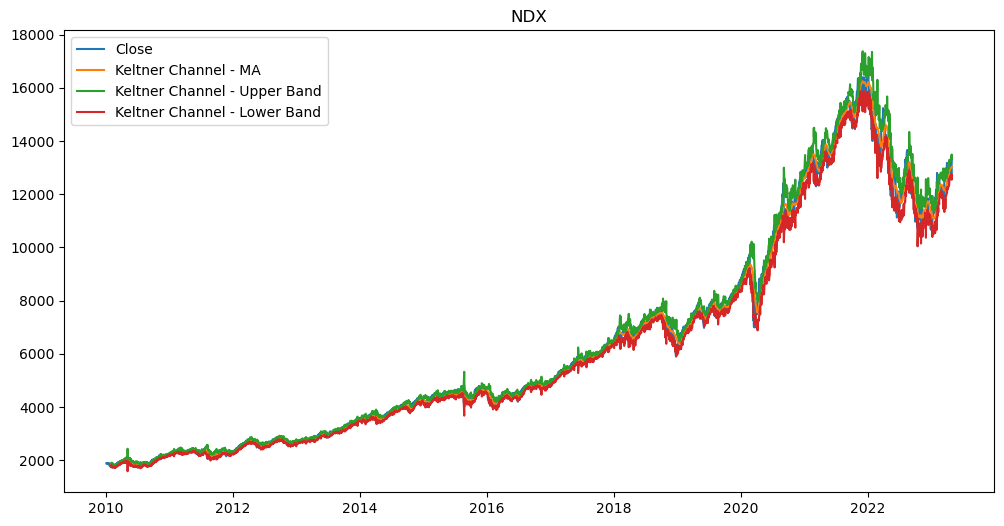

In [213]:
data=yf.download('^NDX', start='2010-1-1', end='2023-5-1')
data['KC_MA'] = data['Close'].rolling(window=20).mean()
data['KC_ATR'] = data['High'] - data['Low']
data['KC_UB'] = data['KC_MA'] + (2 * data['KC_ATR'])
data['KC_LB'] = data['KC_MA'] - (2 * data['KC_ATR'])
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['KC_MA'], label='Keltner Channel - MA')
plt.plot(data['KC_UB'], label='Keltner Channel - Upper Band')
plt.plot(data['KC_LB'], label='Keltner Channel - Lower Band')
plt.title("NDX")
plt.legend()
plt.show()


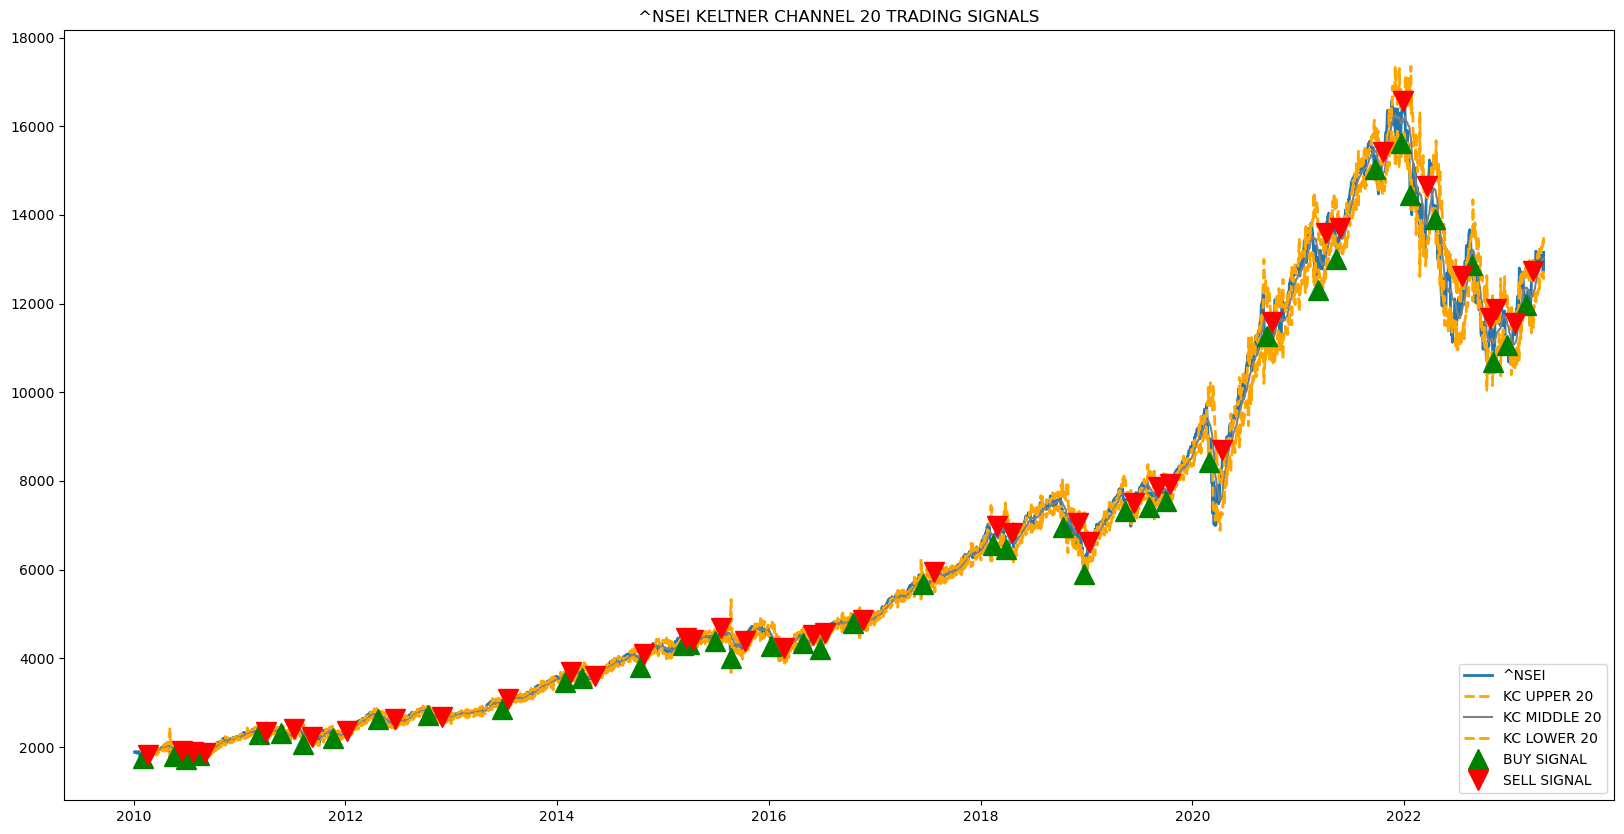

In [214]:
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal
buy_price, sell_price, kc_signal = implement_kc_strategy(data['Close'], data['KC_UB'], data['KC_LB'])
data=data.iloc[:-1,:]

plt.figure(figsize=(20,10))
plt.plot(data['Close'], linewidth = 2, label = '^NSEI')
plt.plot(data['KC_UB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC UPPER 20')
plt.plot(data['KC_MA'], linewidth = 1.5, color = 'grey', label = 'KC MIDDLE 20')
plt.plot(data['KC_LB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC LOWER 20')
plt.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'lower right')
plt.title('^NSEI KELTNER CHANNEL 20 TRADING SIGNALS')
plt.show()

In [215]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]
np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)

In [216]:
import math
def sharpe_ratio(data, risk_free_rate=0):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)
sharpe_ratio(np2-np1)

0.5345554145045922

In [217]:


def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np2-np1)

0.3998792079956027

In [218]:
print("MDD_KC",(np1-np2).min()/np2[18,0]*100,"%")
print("CUMM_Return_KC",((np2-np1)/np1).max()*100,"%")

MDD_KC -30.701894989649354 %
CUMM_Return_KC 12.231683690660775 %


# Parameter Optimization:


In [219]:
from sklearn.model_selection import GridSearchCV
import ta
from sklearn.base import BaseEstimator
# Custom estimator class for Keltner Channel
class KeltnerChannelEstimator(BaseEstimator):
    def __init__(self, window):
        self.window = window

    def fit(self, X, y=None):
        indicator = ta.volatility.KeltnerChannel(X['Close'], X['Low'], X['Close'], window=self.window, fillna=True)
        return self

# Custom estimator class for Bollinger Bands
class BollingerBandsEstimator(BaseEstimator):
    def __init__(self, window):
        self.window = window

    def fit(self, X, y=None):
        indicator = ta.volatility.BollingerBands(X['Close'], window=self.window, fillna=True)
        return self
# Custom estimator class for MACD

class MACDEstimator(BaseEstimator):
    def __init__(self, window_slow, window_fast):
        self.window_slow = window_slow
        self.window_fast = window_fast

    def fit(self, X, y=None):
        indicator = ta.trend.MACD(X['Close'], window_slow=self.window_slow, window_fast=self.window_fast, fillna=True)
        return self


nsei_data = df[df['Ticker'] == '^NSEI']
# Define the parameter grid for each indicator
keltner_params = {'window': [10, 20, 30]}
bollinger_params = {'window': [10, 20, 30]}
macd_params = {'window_slow': [26, 30, 34], 'window_fast': [12, 14, 16]}

ndx_data=df[df['Ticker'] == '^NDX']
# Define the scoring metrics for evaluation
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}

# Perform grid search for Keltner Channel
keltner_grid = GridSearchCV(estimator=KeltnerChannelEstimator(window=10), param_grid=keltner_params, scoring=scoring, refit=False)
keltner_grid.fit(ndx_data)
keltner_results = pd.DataFrame(keltner_grid.cv_results_)

# Perform grid search for Bollinger Bands
bollinger_grid = GridSearchCV(estimator=BollingerBandsEstimator(window=10), param_grid=bollinger_params, scoring=scoring, refit=False)
bollinger_grid.fit(ndx_data)
bollinger_results = pd.DataFrame(bollinger_grid.cv_results_)


 # Create an instance of MACDEstimator
macd_estimator = MACDEstimator(window_slow=26, window_fast=12)

macd_grid = GridSearchCV(estimator=macd_estimator, param_grid=macd_params, scoring=scoring, refit=False)
macd_grid.fit(ndx_data)
macd_results = pd.DataFrame(macd_grid.cv_results_)



# Evaluate the grid search results
keltner_best_params = keltner_results.loc[keltner_results['rank_test_accuracy'] == 1, 'params'].values[0]
bollinger_best_params = bollinger_results.loc[bollinger_results['rank_test_accuracy'] == 1, 'params'].values[0]
macd_best_params = macd_results.loc[macd_results['rank_test_accuracy'] == 1, 'params'].values[0]

print("Optimized Parameters:")
print("Keltner Channel:", keltner_best_params)
print("Bollinger Bands:", bollinger_best_params)
print("MACD:", macd_best_params)

Optimized Parameters:
Keltner Channel: {'window': 10}
Bollinger Bands: {'window': 10}
MACD: {'window_fast': 12, 'window_slow': 26}


/Users/siddhant/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/siddhant/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _score() missing 1 required positional argument: 'y_true'


/Users/siddhant/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan]

/Users/siddhant/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]



# Signal Generation:

In [220]:
# Apply the optimized parameters to the indicators
keltner_indicator = ta.volatility.KeltnerChannel(ndx_data['Close'], ndx_data['Low'], ndx_data['Close'], window=keltner_best_params['window'], fillna=True)
bollinger_indicator = ta.volatility.BollingerBands(ndx_data['Close'], window=bollinger_best_params['window'], fillna=True)
macd_indicator = ta.trend.MACD(ndx_data['Close'], window_slow=macd_best_params['window_slow'], window_fast=macd_best_params['window_fast'], fillna=True)

# Generate buy and sell signals
keltner_signal = np.where(ndx_data['Close'] > keltner_indicator.keltner_channel_hband(), 1, 0)  # Buy signal
bollinger_signal = np.where(ndx_data['Close'] < bollinger_indicator.bollinger_lband(), -1, 0)  # Sell signal
macd_signal = np.where(macd_indicator.macd() > macd_indicator.macd_signal(), 1, -1)  # Buy and sell signals based on MACD histogram


# Combine the signals
combined_signal = keltner_signal + bollinger_signal + macd_signal

# Record the signals, dates, and calculate returns
signals = pd.DataFrame({
    'Date': ndx_data['Date'],
    'Signal': combined_signal
})

# Calculate the returns
signals['Return'] = signals['Signal'].shift(-1) * ndx_data['Close'].pct_change()

# Calculate additional metrics
total_trades = len(signals)
positive_trades = len(signals[signals['Return'] > 0])
negative_trades = len(signals[signals['Return'] < 0])
win_rate = positive_trades / total_trades * 100

# Print the signals and metrics
print("Generated Signals:")
print(signals)

print("\nMetrics:")
print("Total Trades:", total_trades)
print("Positive Trades:", positive_trades)
print("Negative Trades:", negative_trades)
print("Win Rate (%):", win_rate)


Generated Signals:
            Date  Signal    Return
0     2010-01-11      -1       NaN
1     2010-01-12      -1  0.012962
2     2010-01-13      -1 -0.013073
3     2010-01-14      -1 -0.000207
4     2010-01-15      -1 -0.000000
...          ...     ...       ...
3347  2023-04-28       0  0.000000
3348  2023-05-01       0 -0.000000
3349  2023-05-02       0  0.008904
3350  2023-05-03      -1  0.006364
3351  2023-05-04      -1       NaN

[3352 rows x 3 columns]

Metrics:
Total Trades: 3352
Positive Trades: 1878
Negative Trades: 1127
Win Rate (%): 56.02625298329356


In [221]:

# Apply the optimized parameters to the indicators
keltner_indicator = ta.volatility.KeltnerChannel(nsei_data['Close'], nsei_data['Low'], nsei_data['Close'], window=keltner_best_params['window'], fillna=True)
bollinger_indicator = ta.volatility.BollingerBands(nsei_data['Close'], window=bollinger_best_params['window'], fillna=True)
macd_indicator = ta.trend.MACD(nsei_data['Close'], window_slow=macd_best_params['window_slow'], window_fast=macd_best_params['window_fast'], fillna=True)

# Generate buy and sell signals
keltner_signal = np.where(nsei_data['Close'] > keltner_indicator.keltner_channel_hband(), 1, 0)  # Buy signal
bollinger_signal = np.where(nsei_data['Close'] < bollinger_indicator.bollinger_lband(), -1, 0)  # Sell signal
macd_signal = np.where(macd_indicator.macd() > macd_indicator.macd_signal(), 1, -1)  # Buy and sell signals based on MACD histogram


# Combine the signals
combined_signal = keltner_signal + bollinger_signal + macd_signal

# Record the signals, dates, and calculate returns
signals = pd.DataFrame({
    'Date': nsei_data['Date'],
    'Signal': combined_signal
})

# Calculate the returns
signals['Return'] = signals['Signal'].shift(-1) * nsei_data['Close'].pct_change()

# Calculate additional metrics
total_trades = len(signals)
positive_trades = len(signals[signals['Return'] > 0])
negative_trades = len(signals[signals['Return'] < 0])
win_rate = positive_trades / total_trades * 100

# Print the signals and metrics
print("Generated Signals:")
print(signals)

print("\nMetrics:")
print("Total Trades:", total_trades)
print("Positive Trades:", positive_trades)
print("Negative Trades:", negative_trades)
print("Win Rate (%):", win_rate)


Generated Signals:
            Date  Signal    Return
3352  2010-01-10      -1       NaN
3353  2010-01-11      -1  0.007429
3354  2010-01-12      -1  0.000000
3355  2010-01-13       0  0.004958
3356  2010-01-14       1 -0.002928
...          ...     ...       ...
6613  2023-04-26       2  0.011390
6614  2023-04-27       2  0.016740
6615  2023-05-01       2  0.009150
6616  2023-05-02       2 -0.006370
6617  2023-05-03       2       NaN

[3266 rows x 3 columns]

Metrics:
Total Trades: 3266
Positive Trades: 1913
Negative Trades: 999
Win Rate (%): 58.57317819963258
